## Problem Statement:
### Use Classification techniques to predict the Heart Disease

### Classification:
*This process of looking at features and putting things into groups is what we call "classification." It's like a fun game of sorting based on what we know about different things!

*For example, if they see a red, round fruit, they'll say, "It's an apple!" If they see an orange, bumpy fruit, they'll say, "It's an orange!" And if they see a yellow, long, curved fruit, they'll say, "It's a banana!"

*So, classification is just a way of sorting things into groups based on what we can see or learn about them. It's a cool and helpful technique that both us and computers can use to organize and understand the world around us!

#### 1. *Load Required Libraries*

In [4]:
import pandas as pd              # for data manupulation 
import numpy as np                # for performing mathematical calculation
import seaborn as sns                 # for visualisation
import matplotlib.pyplot as plt        # for visualisation
import warnings

In [5]:
warnings.filterwarnings("ignore", category=Warning)

### 2. *Load Data*

In [6]:
df=pd.read_csv("D:\downloads\8b380cae-f944-42bc-8d44-d0b791b997b8.csv")

### 3. Know About Data

In [7]:
print('We have {} rows.'.format(df.shape[0]))
print('We have {} columns'.format(df.shape[1]))
df.iloc[1,:]

We have 3390 rows.
We have 17 columns


id                     1
age                   36
education            4.0
sex                    M
is_smoking            NO
cigsPerDay           0.0
BPMeds               0.0
prevalentStroke        0
prevalentHyp           1
diabetes               0
totChol            212.0
sysBP              168.0
diaBP               98.0
BMI                29.77
heartRate           72.0
glucose             75.0
TenYearCHD             0
Name: 1, dtype: object

### Unique elements

In [8]:
df.nunique()       # prints the count of number of unique elements in each column

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [9]:
for col in df.columns:                                # prints the unique values in each column
    unique_values = df[col].unique()
    print(f"Unique values in '{col}' column:")
    print(unique_values)
    print()

Unique values in 'id' column:
[   0    1    2 ... 3387 3388 3389]

Unique values in 'age' column:
[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]

Unique values in 'education' column:
[ 2.  4.  1.  3. nan]

Unique values in 'sex' column:
['F' 'M']

Unique values in 'is_smoking' column:
['YES' 'NO']

Unique values in 'cigsPerDay' column:
[ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]

Unique values in 'BPMeds' column:
[ 0. nan  1.]

Unique values in 'prevalentStroke' column:
[0 1]

Unique values in 'prevalentHyp' column:
[0 1]

Unique values in 'diabetes' column:
[0 1]

Unique values in 'totChol' column:
[221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 

In [10]:
df.info()    # provides short summary of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [11]:
print("no of males anf females ",df['sex'].value_counts())
print(df['education'].value_counts())
print(df['is_smoking'].value_counts())
print(df['BPMeds'].value_counts())
print(df['prevalentStroke'].value_counts())
print(df['diabetes'].value_counts())
print(df['TenYearCHD'].value_counts())

no of males anf females  F    1923
M    1467
Name: sex, dtype: int64
1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
NO     1703
YES    1687
Name: is_smoking, dtype: int64
0.0    3246
1.0     100
Name: BPMeds, dtype: int64
0    3368
1      22
Name: prevalentStroke, dtype: int64
0    3303
1      87
Name: diabetes, dtype: int64
0    2879
1     511
Name: TenYearCHD, dtype: int64


### Duplicate Values

In [12]:
df.duplicated().sum()            # prints number of duplicated value in eacch column

0

### Missing values

#### Missing value identifiaction

In [13]:
df.isnull().sum()                # check whether null values present in any column

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

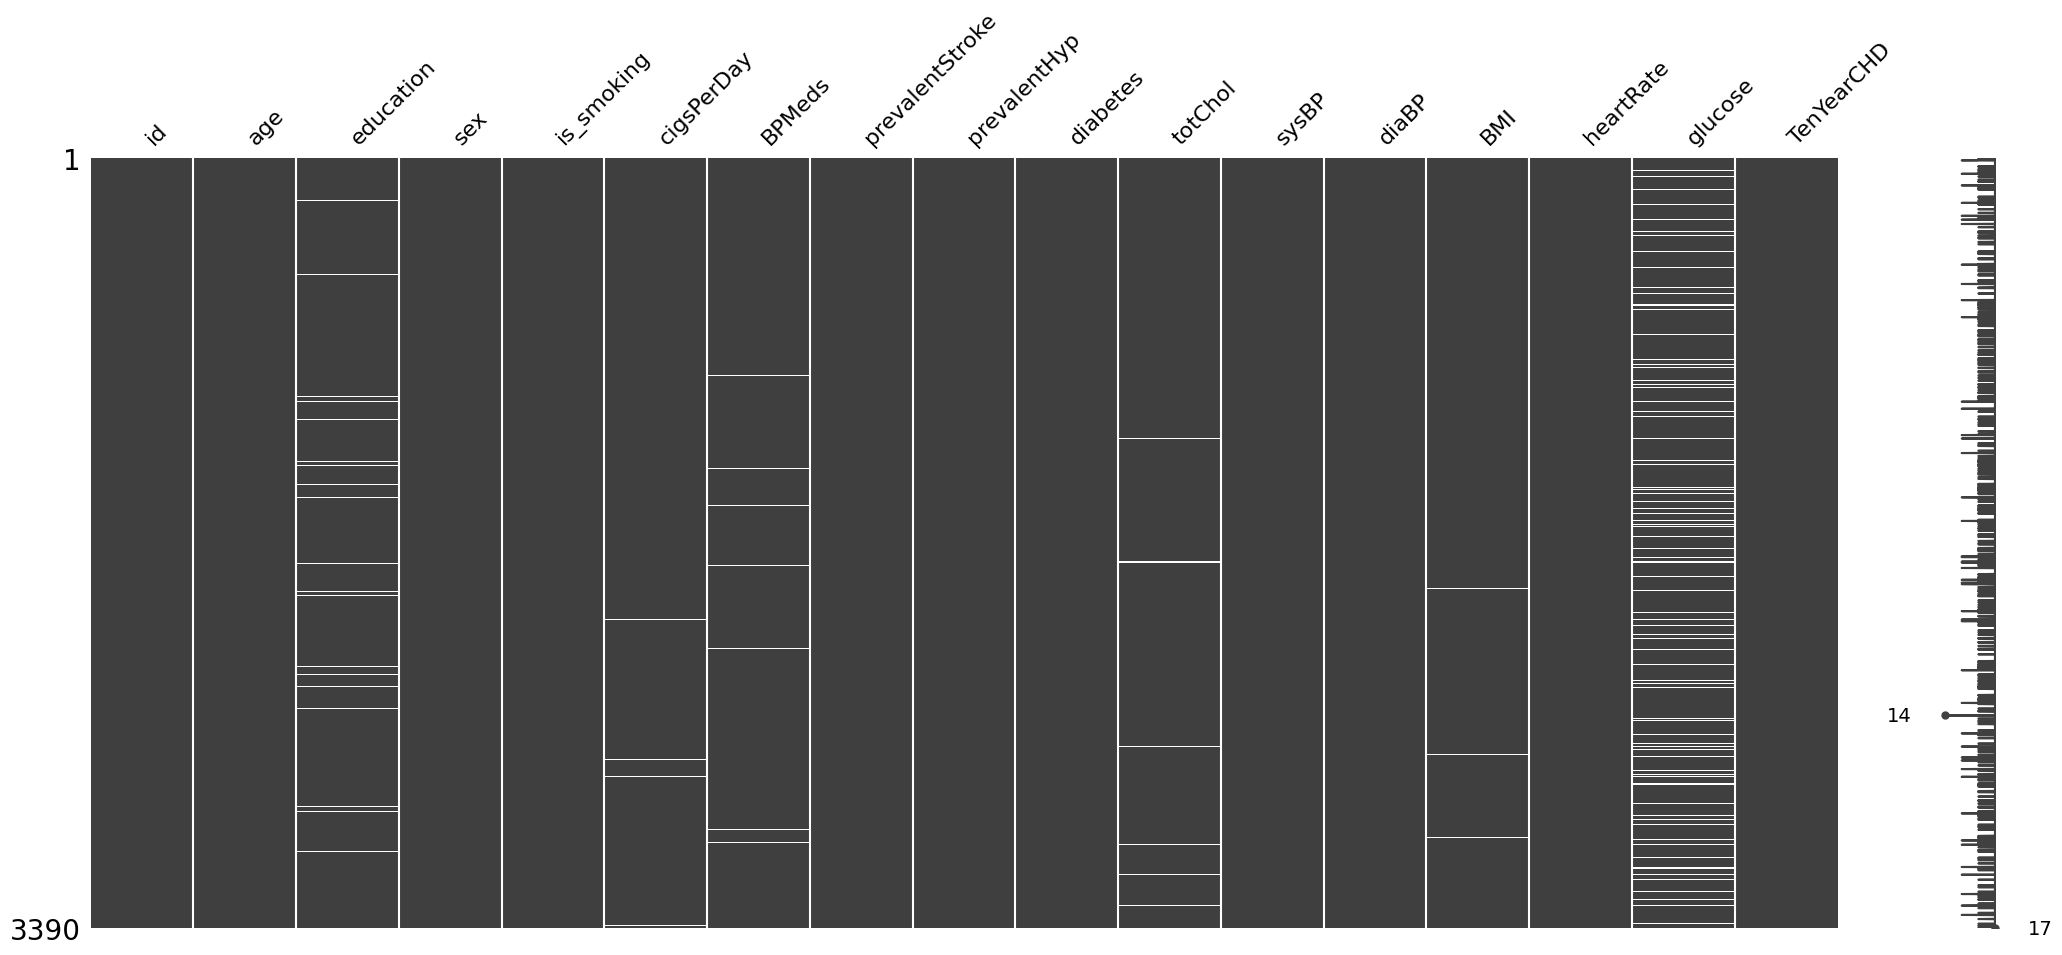

In [14]:
import missingno as msno
msno.matrix(df)

In [15]:
print(df.isnull().sum().sum())            # prints total no of null values in dataset

510


#### Missing value treatement

<Axes: >

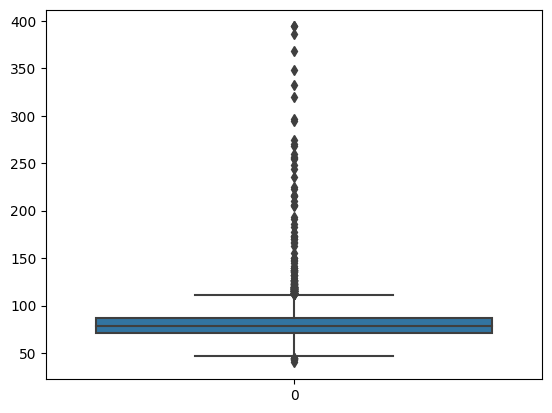

In [16]:
sns.boxplot(df['glucose'])

In [17]:
replace_glucose=df['glucose'].median()
df["glucose"].fillna(replace_glucose, inplace = True)
df=df.dropna()

In [18]:
df.shape

(3189, 17)

<Axes: >

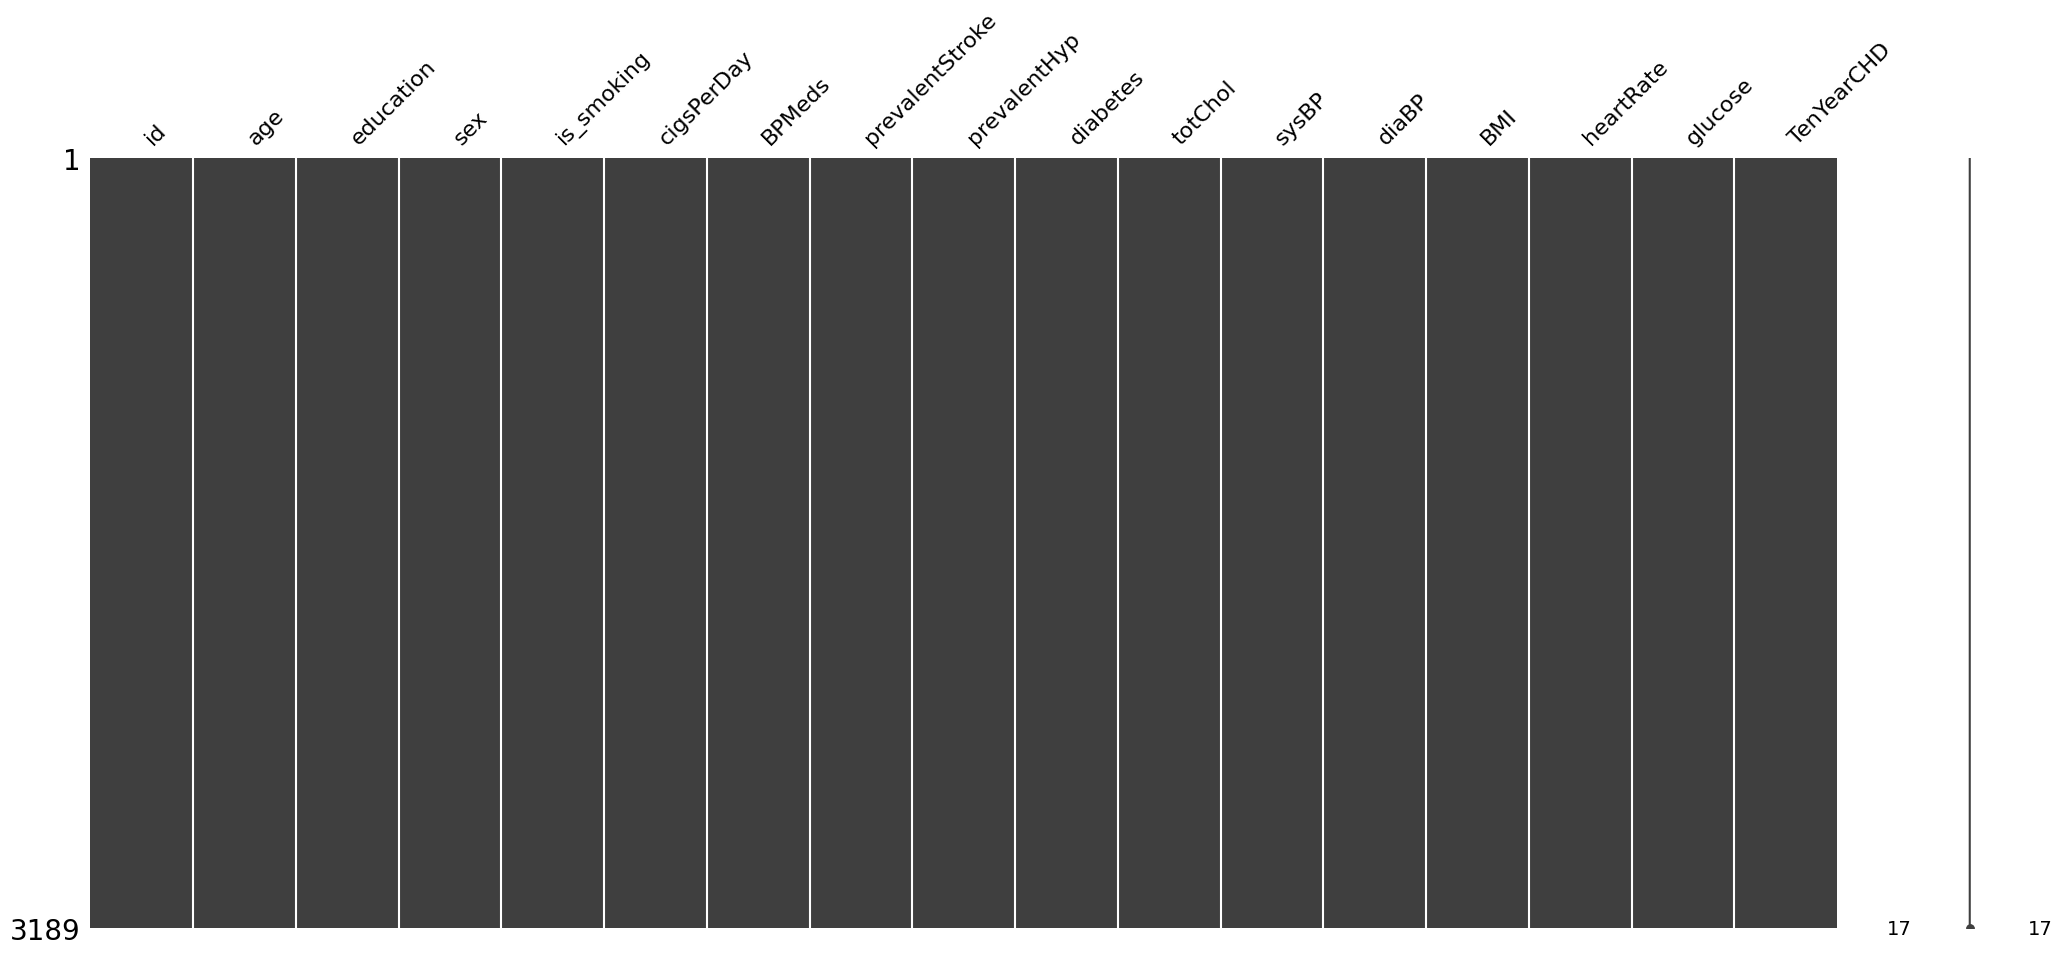

In [19]:
msno.matrix(df)

### Outlier Detection

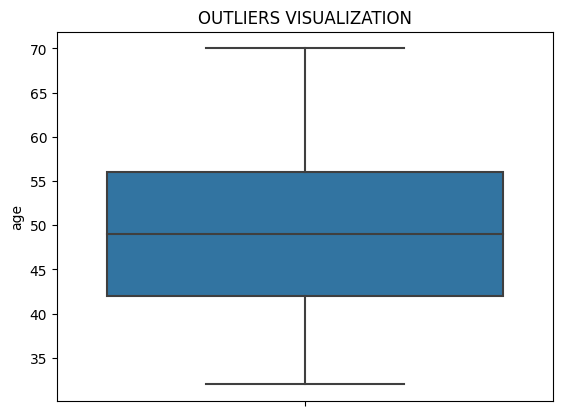

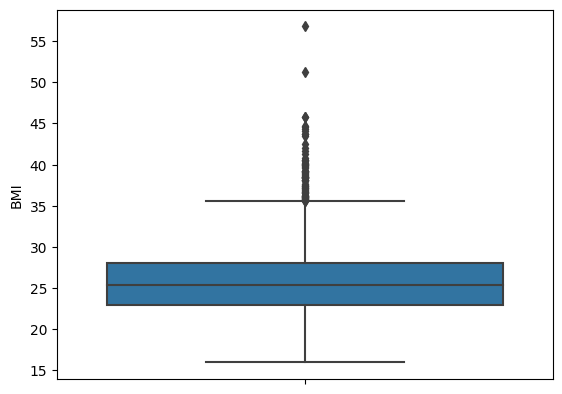

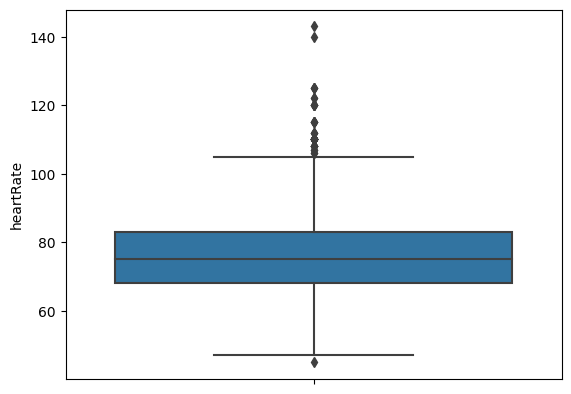

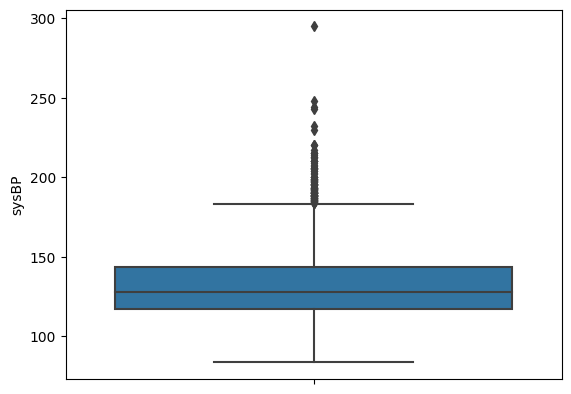

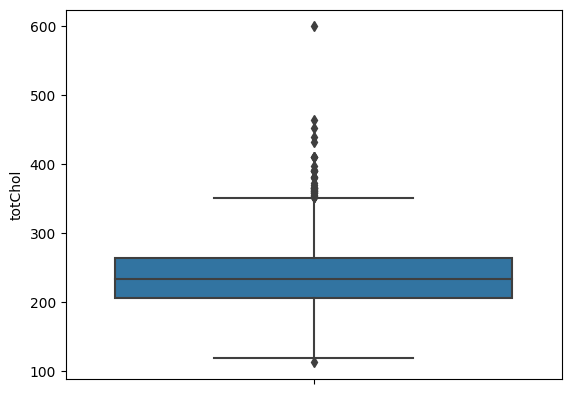

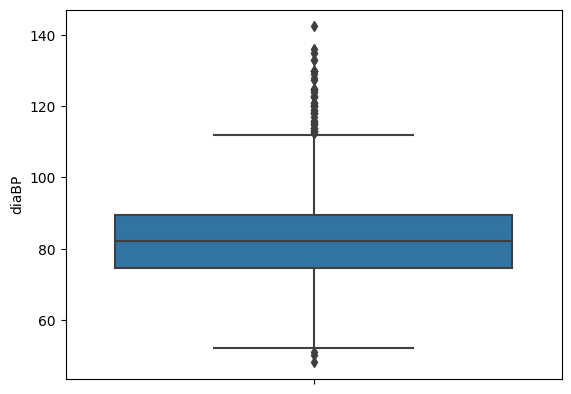

In [20]:
#Outliers
cols =['age','BMI','heartRate','sysBP','totChol','diaBP']
plt.title("OUTLIERS VISUALIZATION")
for i in cols:
    df[i]
    sns.boxplot(data=df,y=i)
    plt.show()

### EDA

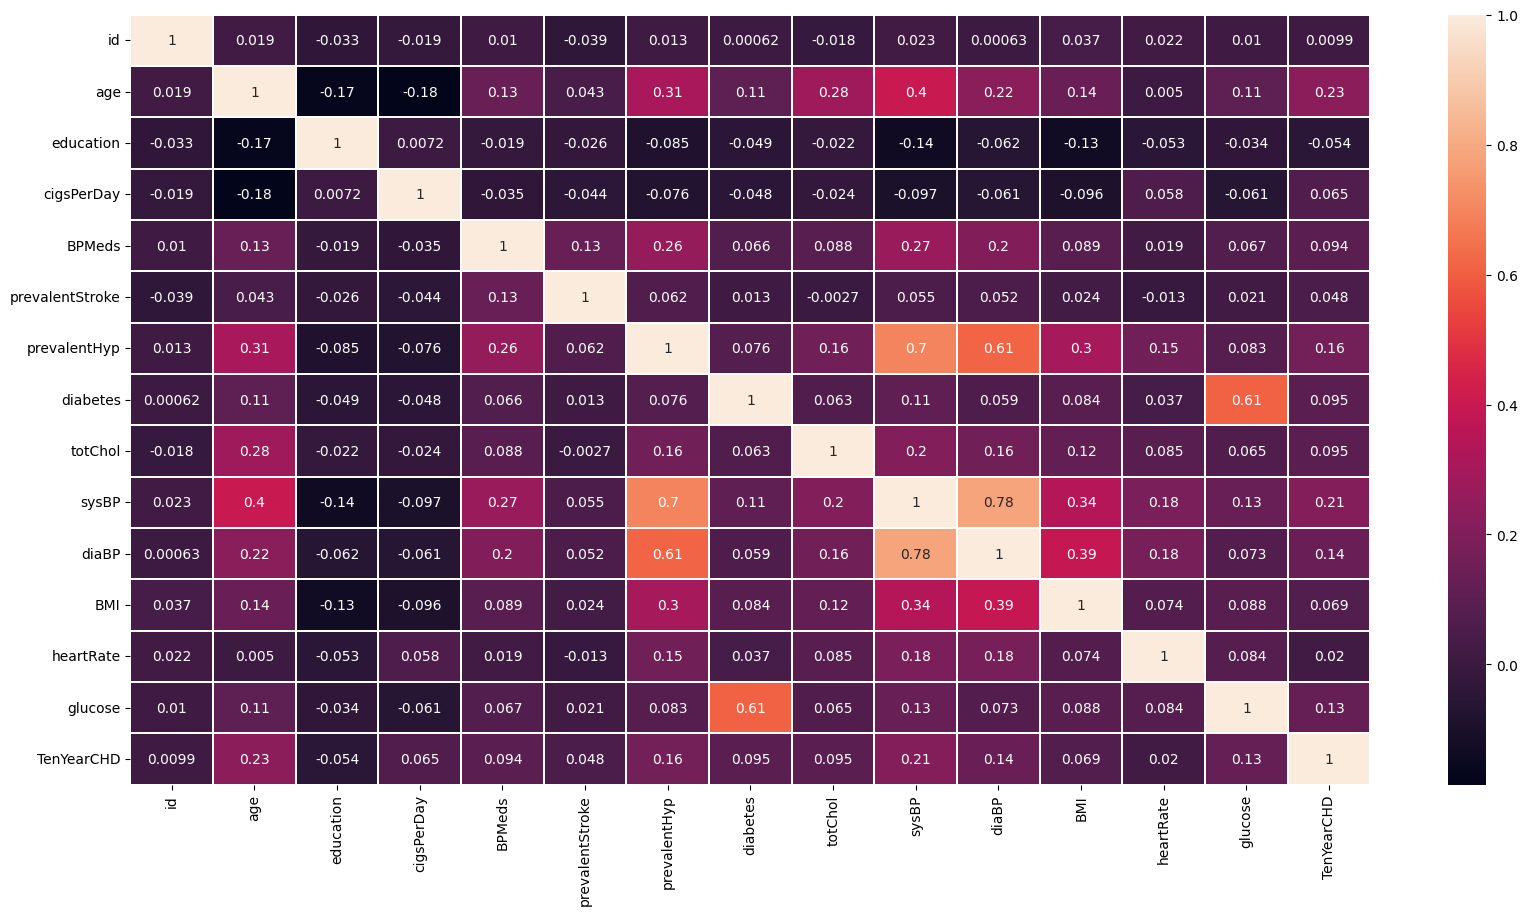

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths=0.1,annot=True)
# linewidths is white space between boxes and annot gives value
plt.show()

* Diabetes and Glucose are correlated
* diaBp and SysBP are correlated
* prevalentHyp is correlated with sysBp

Median cigs Per Day: 0.0


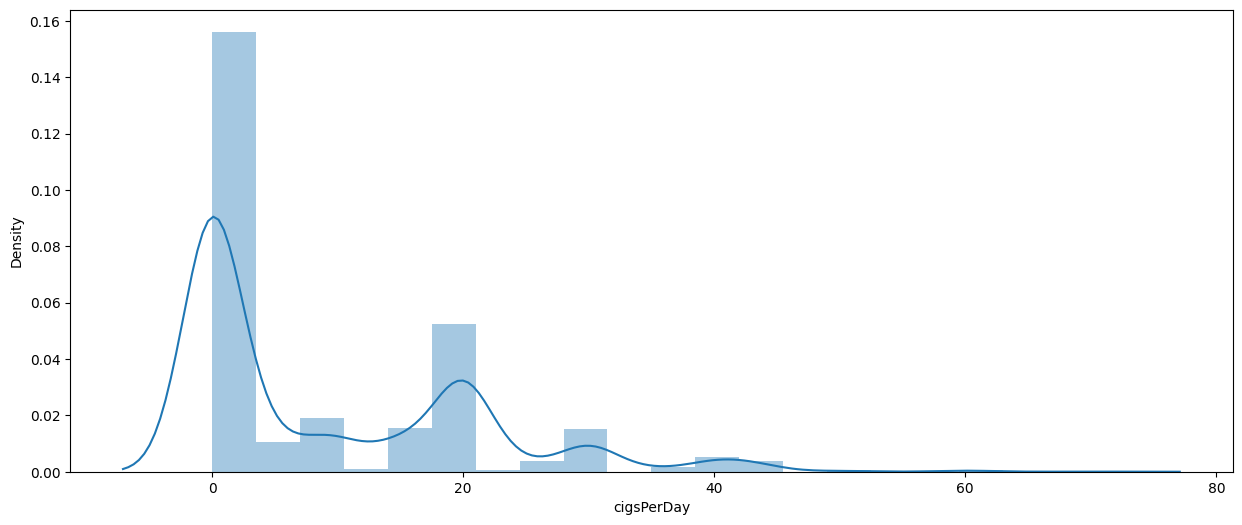

In [22]:
plt.figure(figsize=(15,6))
sns.distplot(df['cigsPerDay'],bins=20)
print("Median cigs Per Day:",df['cigsPerDay'].median())
## Most of the people are non-smoker

<Axes: xlabel='sex', ylabel='count'>

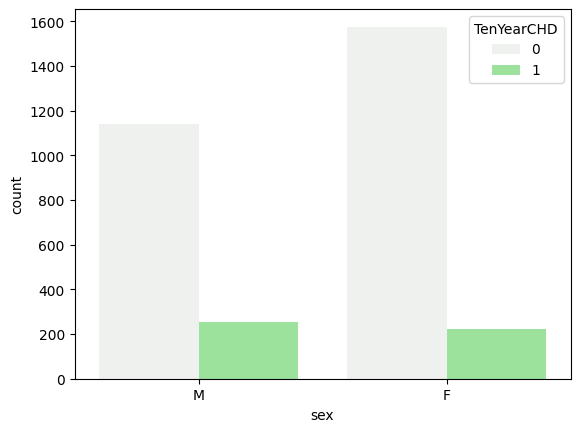

In [23]:
sns.countplot(x=df['sex'], hue=df['TenYearCHD'],color='lightgreen')

In [24]:
print("no of males anf females ",df['sex'].value_counts())
## Females are more

no of males anf females  F    1796
M    1393
Name: sex, dtype: int64


In [25]:
print("no of 0's and 1's : ",df['TenYearCHD'].value_counts())

no of 0's and 1's :  0    2714
1     475
Name: TenYearCHD, dtype: int64


### Feature selection

In [26]:
df1=df.copy()

In [27]:
df1.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [28]:
print(df1['totChol'].mean())
print(df1['totChol'].median())
print(df1['totChol'].min())
print(df1['totChol'].max())

236.96864220758857
234.0
113.0
600.0


In [29]:
df1.loc[df1['totChol'] == 600]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
423,423,52,2.0,F,NO,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1


In [30]:
df1.drop(['id','education','cigsPerDay','BPMeds','heartRate'],axis=1,inplace=True)

In [31]:
df1.head()

,age,sex,is_smoking,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
1,36,M,NO,0,1,0,212.0,168.0,98.0,29.77,75.0,0
2,46,F,YES,0,0,0,250.0,116.0,71.0,20.35,94.0,0
3,50,M,YES,0,1,0,233.0,158.0,88.0,28.26,94.0,1
4,64,F,YES,0,0,0,241.0,136.5,85.0,26.42,77.0,0
5,61,F,NO,0,1,0,272.0,182.0,121.0,32.80,65.0,1


### Feature Engineering

 MBP = diastolic blood pressure (DBP) + 1/3 [systolic blood pressure (SBP) – DBP].

In [32]:
df1['MBP']=df1['diaBP'] + (df1['sysBP'] - df1['diaBP']) / 3

In [33]:
df1.head()

,age,sex,is_smoking,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD,MBP
1,36,M,NO,0,1,0,212.0,168.0,98.0,29.77,75.0,0,121.333333
2,46,F,YES,0,0,0,250.0,116.0,71.0,20.35,94.0,0,86.000000
3,50,M,YES,0,1,0,233.0,158.0,88.0,28.26,94.0,1,111.333333
4,64,F,YES,0,0,0,241.0,136.5,85.0,26.42,77.0,0,102.166667
5,61,F,NO,0,1,0,272.0,182.0,121.0,32.80,65.0,1,141.333333


In [34]:
df1.drop(['sysBP','diaBP'],axis=1,inplace=True)

In [35]:
df1.head()

,age,sex,is_smoking,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,glucose,TenYearCHD,MBP
1,36,M,NO,0,1,0,212.0,29.77,75.0,0,121.333333
2,46,F,YES,0,0,0,250.0,20.35,94.0,0,86.000000
3,50,M,YES,0,1,0,233.0,28.26,94.0,1,111.333333
4,64,F,YES,0,0,0,241.0,26.42,77.0,0,102.166667
5,61,F,NO,0,1,0,272.0,32.80,65.0,1,141.333333


### Feature Transformation

In [36]:
for column in ['sex', 'is_smoking']:
            dummies = pd.get_dummies(df1[column],prefix=[column],drop_first=True)
            df1[dummies.columns] = dummies
            

In [37]:
df1.head()

,age,sex,is_smoking,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,glucose,TenYearCHD,MBP,['sex']_M,['is_smoking']_YES
1,36,M,NO,0,1,0,212.0,29.77,75.0,0,121.333333,1,0
2,46,F,YES,0,0,0,250.0,20.35,94.0,0,86.000000,0,1
3,50,M,YES,0,1,0,233.0,28.26,94.0,1,111.333333,1,1
4,64,F,YES,0,0,0,241.0,26.42,77.0,0,102.166667,0,1
5,61,F,NO,0,1,0,272.0,32.80,65.0,1,141.333333,0,0


In [38]:
df1.drop(['sex','is_smoking'],axis=1,inplace=True)

In [39]:
df1.head()

,age,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,glucose,TenYearCHD,MBP,['sex']_M,['is_smoking']_YES
1,36,0,1,0,212.0,29.77,75.0,0,121.333333,1,0
2,46,0,0,0,250.0,20.35,94.0,0,86.000000,0,1
3,50,0,1,0,233.0,28.26,94.0,1,111.333333,1,1
4,64,0,0,0,241.0,26.42,77.0,0,102.166667,0,1
5,61,0,1,0,272.0,32.80,65.0,1,141.333333,0,0


In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))   
df_scaled_fit = scaler.fit(df1)
df_scaled_fit = scaler.transform(df1)
df_scaled_fit = pd.DataFrame(df_scaled_fit)
df_scaled_fit.columns = [df1.columns]
df_scaled_fit.head()

,age,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,glucose,TenYearCHD,MBP,['sex']_M,['is_smoking']_YES
0,0.105263,0.0,1.0,0.0,0.203285,0.338149,0.098870,0.0,0.467550,1.0,0.0
1,0.368421,0.0,0.0,0.0,0.281314,0.107493,0.152542,0.0,0.186755,0.0,1.0
2,0.473684,0.0,1.0,0.0,0.246407,0.301175,0.152542,1.0,0.388079,1.0,1.0
3,0.842105,0.0,0.0,0.0,0.262834,0.256121,0.104520,0.0,0.315232,0.0,1.0
4,0.763158,0.0,1.0,0.0,0.326489,0.412341,0.070621,1.0,0.626490,0.0,0.0


### Model Building

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
df1.shape

(3189, 11)

In [45]:
y = df_scaled_fit['TenYearCHD'][::1]
X = df_scaled_fit.drop(['TenYearCHD'], axis = 1)





# divide train test: 70 % - 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [46]:
X.shape

(3189, 10)

In [47]:
y.shape

(3189, 1)

In [48]:
df1.columns

Index(['age', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI',
       'glucose', 'TenYearCHD', 'MBP', '['sex']_M', '['is_smoking']_YES'],
      dtype='object')

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
#initialize model
logreg = LogisticRegression()

In [51]:
logreg.fit(X, y)

LogisticRegression()

In [52]:
y_pred = logreg.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)
print("Accuraacy:",accuracy)
recall = recall_score(y_test, y_pred)
precision=precision_score(y_test,y_pred)
print("-------------------------------------------------------------------")
print(f"The recall score for LogisticRegression is: {round(recall,3)*100}%")
print(f"The precision score for LogisticRegression is: {round(precision,3)*100}%")
print("---------------------------------------------------------------")
print('training accuracy = '+str(logreg.score(X_train, y_train)*100))
print('testing accuracy = '+str(logreg.score(X_test, y_test)*100))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       794
         1.0       1.00      0.04      0.08       163

    accuracy                           0.84       957
   macro avg       0.92      0.52      0.50       957
weighted avg       0.86      0.84      0.77       957

Accuraacy: 0.8369905956112853
-------------------------------------------------------------------
The recall score for LogisticRegression is: 4.3%
The precision score for LogisticRegression is: 100.0%
---------------------------------------------------------------
training accuracy = 86.55913978494624
testing accuracy = 83.69905956112854


### Parameter Tuning

In [54]:
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [55]:
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
 
logreg_cv.fit(X, y)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.8538717440195273


In [56]:
from sklearn.metrics import accuracy_score, classification_report

In [57]:
y_pred1 = logreg_cv.predict(X_test)

### Evaluvation

In [58]:
accuracy = accuracy_score(y_test, y_pred1)
report = classification_report(y_test, y_pred1)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
recall = recall_score(y_test, y_pred1)
precision=precision_score(y_test,y_pred1)

print(f"The recall score for LogisticRegression is: {round(recall,3)*100}%")
print(recall)
print(f"The precision score for LogisticRegression is: {round(precision,3)*100}%")

Accuracy: 0.8369905956112853
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       794
         1.0       0.73      0.07      0.12       163

    accuracy                           0.84       957
   macro avg       0.79      0.53      0.52       957
weighted avg       0.82      0.84      0.78       957

The recall score for LogisticRegression is: 6.7%
0.06748466257668712
The precision score for LogisticRegression is: 73.3%


In [59]:
print("no of 0's and 1's : ",df_scaled_fit['TenYearCHD'].value_counts())

no of 0's and 1's :  (TenYearCHD,)
0.0              2714
1.0               475
dtype: int64


In [64]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df_scaled_fit.drop('TenYearCHD', axis=1), df_scaled_fit['TenYearCHD'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [74]:
print("no of 0's and 1's : ",oversampled['TenYearCHD'].value_counts())

no of 0's and 1's :  (TenYearCHD,)
0.0              2714
1.0              2714
dtype: int64


In [81]:
# print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1.0)))
# print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0.0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority',random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1.0)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0.0)))


In [83]:
print("no of 0's and 1's : ",y_train['TenYearCHD'].value_counts())

no of 0's and 1's :  (TenYearCHD,)
1.0              1920
0.0              1879
dtype: int64


In [82]:
print("no of 0's and 1's : ",y_train_res['TenYearCHD'].value_counts())

no of 0's and 1's :  (TenYearCHD,)
0.0              1920
1.0              1920
dtype: int64


In [85]:

lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.68      0.64      0.66       835
         1.0       0.64      0.69      0.67       794

    accuracy                           0.66      1629
   macro avg       0.66      0.66      0.66      1629
weighted avg       0.66      0.66      0.66      1629



In [92]:
recall = recall_score(y_test, predictions)
precision=precision_score(y_test,predictions)

print(f"The recall score for LogisticRegression is: {round(recall,3)*100}%")
print(f"The precision score for LogisticRegression is: {round(precision,3)*100}%")
accuracy = accuracy_score(y_test, predictions)


print("Accuracy:", accuracy)
f1_score(y_test, predictions)

The recall score for LogisticRegression is: 69.1%
The precision score for LogisticRegression is: 64.4%
Accuracy: 0.6629834254143646


0.6666666666666667

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

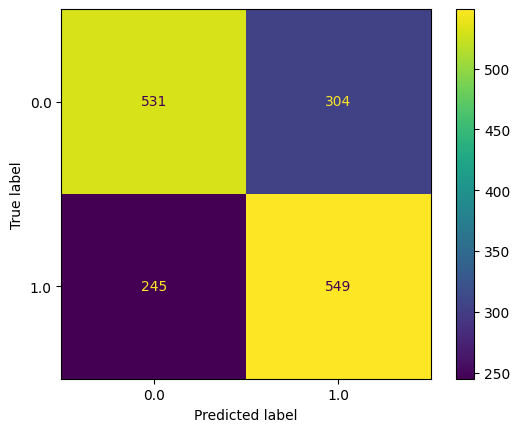

In [88]:
cm = confusion_matrix(y_test, predictions, labels=logreg_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg_cv.classes_)
disp.plot()

plt.show()

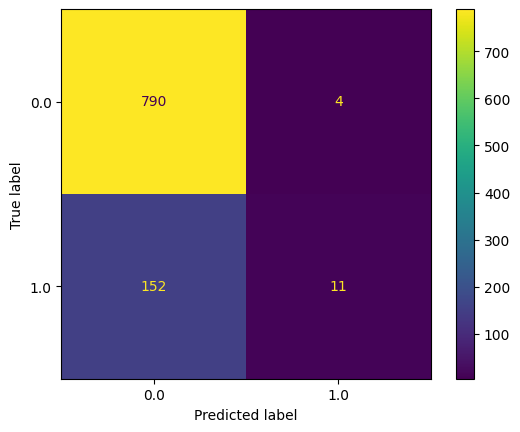

In [ ]:
cm = confusion_matrix(y_test, y_pred1, labels=logreg_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg_cv.classes_)
disp.plot()

plt.show()

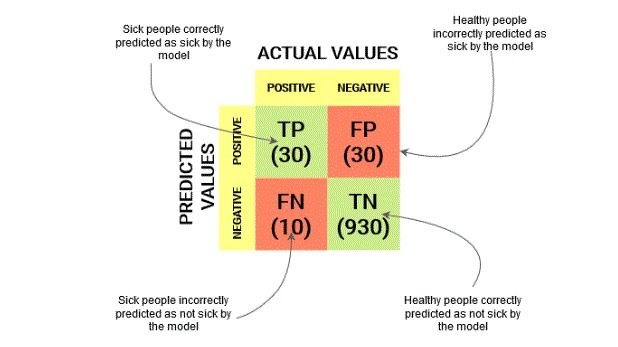

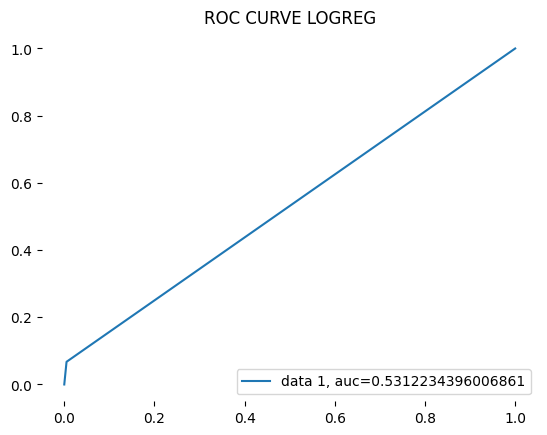

The score for the AUC ROC Curve is: 53.1%


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred1)
auc = roc_auc_score(y_test, y_pred1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE LOGREG')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")

--------------------------------------------------------------------------------------------------------------------

### Trying with other Parameters

In [ ]:
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)


In [ ]:
logistic = LogisticRegression()
gridsearch = GridSearchCV(logistic, hyperparameters)
best_model = gridsearch.fit(X,y)
print(best_model.best_estimator_)
print("Best score is {}".format(best_model.best_score_))

LogisticRegression(C=7.742636826811269, solver='saga')
Best score is 0.8548121828910006


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
randomizedsearch = RandomizedSearchCV(logistic, hyperparameters)
best_model_random = randomizedsearch.fit(X,y)
print(best_model_random.best_estimator_)
print("Best score is {}".format(best_model_random.best_score_))

LogisticRegression(C=7.742636826811269, solver='saga')
Best score is 0.8548121828910006


--------------------------------------------------------------------------------------------------------------------

In [ ]:
import pickle

In [ ]:
pickle.dump(logreg_cv,open('chd_prediction_model1.pkl','wb'))

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [ ]:
def calculate_mbp(sys_bp, dia_bp):
    return dia_bp + (sys_bp - dia_bp) / 3

In [ ]:
calculate_mbp(168,98)

121.33333333333333

In [ ]:
df['glucose'].min()

40.0

In [ ]:
data = pd.DataFrame({
        'age': [18],
        'prevalentStroke': [1],
        'prevalentHyp': [1],
        'diabetes': [1],
        'totChol': [1],
        'BMI': [1],
        'glucose': [1],
        'MBP': [1],
        'sex_M': [1],
        'is_smoking_YES': [1]
    })
    # Make the prediction
prediction = logreg_cv.predict(data)[0]
print(prediction)   

1
